# CUDA MergeSort Weak Scaling Analysis

In [1]:
import sys
sys.path.append("/scratch/group/csce435-f23/python-3.8.17/lib/python3.8/site-packages")
sys.path.append("/scratch/group/csce435-f23/thicket")
from glob import glob

import matplotlib.pyplot as plt
import pandas as pd

import thicket as th

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

What are the files we are analyzing?

In [2]:
all_files = glob("*.cali")
print(all_files)

['v1048576-input3-v2.cali', 'v262144-input0-v32.cali', 'v65536-input0-v256.cali', 'v1048576-input1-v64.cali', 'v16777216-input2-v32.cali', 'v262144-input3-v8.cali', 'v16777216-input2-v1.cali', 'v65536-input3-v4.cali', 'v1048576-input2-v32.cali', 'v262144-input2-v256.cali', 'v4194305-input3-v128.cali', 'v1048576-input3-v4.cali', 'v65536-input0-v32.cali', 'v16777216-input1-v256.cali', 'v16777216-input3-v64.cali', 'v65536-input3-v64.cali', 'v16777216-input3-v128.cali', 'v1048576-input2-v4.cali', 'v1048576-input1-v8.cali', 'v65536-input3-v16.cali', 'v16777216-input2-v2.cali', 'v16777216-input3-v32.cali', 'v65536-input1-v4.cali', 'v1048576-input1-v128.cali', 'v1048576-input2-v64.cali', 'v262144-input3-v128.cali', 'v16777216-input3-v8.cali', 'v65536-input2-v256.cali', 'v65536-input2-v64.cali', 'v1048576-input2-v16.cali', 'v4194305-input3-v4.cali', 'v4194305-input3-v256.cali', 'v262144-input0-v2.cali', 'v4194305-input3-v16.cali', 'v16777216-input1-v16.cali', 'v262144-input2-v16.cali', 'v41943

# Read n files (n = 33)

In [3]:
tk = th.Thicket.from_caliperreader(all_files)

What files?

In [4]:
tk.profile_mapping

OrderedDict([(8671516, 'v262144-input3-v256.cali'),
             (44091453, 'v4194305-input2-v128.cali'),
             (58440835, 'v16777216-input0-v2.cali'),
             (76786853, 'v16777216-input0-v32.cali'),
             (77196017, 'v262144-input2-v64.cali'),
             (80591504, 'v1048576-input1-v64.cali'),
             (84376274, 'v262144-input3-v4.cali'),
             (102273371, 'v16777216-input3-v16.cali'),
             (138885607, 'v16777216-input2-v32.cali'),
             (196264272, 'v1048576-input3-v32.cali'),
             (244049362, 'v262144-input1-v32.cali'),
             (264137306, 'v65536-input0-v2.cali'),
             (287808066, 'v4194305-input3-v8.cali'),
             (301897107, 'v262144-input1-v256.cali'),
             (306754799, 'v65536-input1-v1.cali'),
             (310137372, 'v262144-input1-v1.cali'),
             (311222983, 'v1048576-input3-v2.cali'),
             (328524893, 'v4194305-input2-v16.cali'),
             (358204925, 'v65536-input0-v64.ca

Call tree

In [5]:
tk.statsframe.dataframe["test"] = -1
print(tk.tree(metric_column="test"))

  _____ _     _      _        _   
 |_   _| |__ (_) ___| | _____| |_ 
   | | | '_ \| |/ __| |/ / _ \ __|
   | | | | | | | (__|   <  __/ |_ 
   |_| |_| |_|_|\___|_|\_\___|\__|  v2023.3.0

-1.000 main
├─ -1.000 comm
├─ -1.000 comp_large
│  └─ -1.000 comp_small
├─ -1.000 data_init
└─ -1.000 data_validation

Legend (Metric: test Min: -1.00 Max: -1.00)
█ -1.00 - -1.00
█ -1.00 - -1.00
█ -1.00 - -1.00
█ -1.00 - -1.00
█ -1.00 - -1.00
█ -1.00 - -1.00

name User code    ◀  Only in left graph    ▶  Only in right graph



Performance data

In [6]:
tk.dataframe

nid  \
node                                            profile           
{'name': 'main', 'type': 'function'}            8671516       1   
                                                44091453      1   
                                                58440835      1   
                                                76786853      1   
                                                77196017      1   
                                                80591504      1   
                                                84376274      1   
                                                102273371     1   
                                                138885607     1   
                                                196264272     1   
                                                244049362     1   
                                                264137306     1   
                                                287808066     1   
                                                301897107     1   
                                                306754799     1   
                                                310137372     1   
                                                311222983     1   
                                                328524893     1   
                                                358204925     1   
                                                365143094     1   
                                                381842774     1   
                                                382231175     1   
                                                395602946     1   
                                                398846564     1   
                                                442369960     1   
                                                453632840     1   
                                                456941575     1   
                                                462866790     1   
                                                465991297     1   
                                                467873917     1   
                                                484547645     1   
                                                487486139     1   
                                                498632568     1   
                                                560518681     1   
                                                577222158     1   
                                                643724998     1   
                                                667914561     1   
                                                678488515     1   
                                                738900608     1   
                                                763383476     1   
                                                784597958     1   
                                                823209358     1   
                                                957346126     1   
                                                972329100     1   
                                                974488494     1   
                                                1013574595    1   
                                                1102298252    1   
                                                1126799294    1   
                                                1131632243    1   
                                                1165650726    1   
                                                1179539382    1   
                                                1190377945    1   
                                                1376046046    1   
                                                1406685544    1   
                                                1420618808    1   
                                                1475389331    1   
                                                1484098812    1   
                                                1544686501    1   
                                        

In [7]:
tk.dataframe = tk.dataframe.drop(["nid", "spot.channel", "Min time/rank", "Max time/rank", "Total time", "Min GPU time/rank", "Max GPU time/rank", "Total GPU time"], axis=1)

In [8]:
tk.dataframe

Avg time/rank  \
node                                            profile                     
{'name': 'main', 'type': 'function'}            8671516          0.497816   
                                                44091453         2.110800   
                                                58440835         7.313608   
                                                76786853         7.385199   
                                                77196017         0.490866   
                                                80591504         0.920392   
                                                84376274         0.485410   
                                                102273371       10.145565   
                                                138885607        7.609586   
                                                196264272        0.866773   
                                                244049362        0.487768   
                                                264137306        0.377987   
                                                287808066        2.580286   
                                                301897107        0.519618   
                                                306754799        0.501725   
                                                310137372        0.498747   
                                                311222983        0.882578   
                                                328524893        2.072615   
                                                358204925        0.362965   
                                                365143094        0.453920   
                                                381842774        0.365704   
                                                382231175        0.478930   
                                                395602946        0.453946   
                                                398846564        0.944140   
                                                442369960        2.087084   
                                                453632840       10.271054   
                                                456941575        7.466620   
                                                462866790        0.436023   
                                                465991297        0.459524   
                                                467873917        7.443715   
                                                484547645        7.991962   
                                                487486139        0.951038   
                                                498632568        0.399797   
                                                560518681        2.638328   
                                                577222158        2.964857   
                                                643724998        0.899792   
                                                667914561        7.677372   
                                                678488515        2.108040   
                                                738900608        0.805328   
                                                763383476        0.779345   
                                                784597958        0.385541   
                                                823209358        0.484737   
                                                957346126        0.831192   
                                                972329100       10.483001   
                                                974488494        0.359878   
                                                1013574595       0.392796   
                                                1102298252       0.465382   
                                                1126799294       0.373442   
                                                1131632243       0.443552   
                                                1165650726       0.367648   
                                                11795393

Metadata

In [9]:
tk.metadata

cali.caliper.version  \
profile                           
8671516              2.11.0-dev   
44091453             2.11.0-dev   
58440835             2.11.0-dev   
76786853             2.11.0-dev   
77196017             2.11.0-dev   
80591504             2.11.0-dev   
84376274             2.11.0-dev   
102273371            2.11.0-dev   
138885607            2.11.0-dev   
196264272            2.11.0-dev   
244049362            2.11.0-dev   
264137306            2.11.0-dev   
287808066            2.11.0-dev   
301897107            2.11.0-dev   
306754799            2.11.0-dev   
310137372            2.11.0-dev   
311222983            2.11.0-dev   
328524893            2.11.0-dev   
358204925            2.11.0-dev   
365143094            2.11.0-dev   
381842774            2.11.0-dev   
382231175            2.11.0-dev   
395602946            2.11.0-dev   
398846564            2.11.0-dev   
442369960            2.11.0-dev   
453632840            2.11.0-dev   
456941575            2.11.0-dev   
462866790            2.11.0-dev   
465991297            2.11.0-dev   
467873917            2.11.0-dev   
484547645            2.11.0-dev   
487486139            2.11.0-dev   
498632568            2.11.0-dev   
560518681            2.11.0-dev   
577222158            2.11.0-dev   
643724998            2.11.0-dev   
667914561            2.11.0-dev   
678488515            2.11.0-dev   
738900608            2.11.0-dev   
763383476            2.11.0-dev   
784597958            2.11.0-dev   
823209358            2.11.0-dev   
957346126            2.11.0-dev   
972329100            2.11.0-dev   
974488494            2.11.0-dev   
1013574595           2.11.0-dev   
1102298252           2.11.0-dev   
1126799294           2.11.0-dev   
1131632243           2.11.0-dev   
1165650726           2.11.0-dev   
1179539382           2.11.0-dev   
1190377945           2.11.0-dev   
1376046046           2.11.0-dev   
1406685544           2.11.0-dev   
1420618808           2.11.0-dev   
1475389331           2.11.0-dev   
1484098812           2.11.0-dev   
1544686501           2.11.0-dev   
1577136689           2.11.0-dev   
1589596170           2.11.0-dev   
1598154402           2.11.0-dev   
1602223338           2.11.0-dev   
1620332689           2.11.0-dev   
1642540211           2.11.0-dev   
1644473144           2.11.0-dev   
1688915385           2.11.0-dev   
1689955739           2.11.0-dev   
1692629921           2.11.0-dev   
1707478289           2.11.0-dev   
1711246518           2.11.0-dev   
1754988373           2.11.0-dev   
1774593297           2.11.0-dev   
1875821932           2.11.0-dev   
1878594690           2.11.0-dev   
1882112086           2.11.0-dev   
1891848029           2.11.0-dev   
1894235058           2.11.0-dev   
1895532020           2.11.0-dev   
1932684689           2.11.0-dev   
1987519653           2.11.0-dev   
1988573435           2.11.0-dev   
1999879783           2.11.0-dev   
2002855761           2.11.0-dev   
2018637092           2.11.0-dev   
2069810762           2.11.0-dev   
2164225678           2.11.0-dev   
2193314312           2.11.0-dev   
2222877037           2.11.0-dev   
2247057245           2.11.0-dev   
2249586671           2.11.0-dev   
2266753446           2.11.0-dev   
2276157295           2.11.0-dev   
2292247782           2.11.0-dev   
2336584092           2.11.0-dev   
2339960462           2.11.0-dev   
2354540498           2.11.0-dev   
2370008427           2.11.0-dev   
2375413707           2.11.0-dev   
2389096586           2.11.0-dev   
2473146400           2.11.0-dev   
2484533245           2.11.0-dev   
2486846453           2.11.0-dev   
2492583588           2.11.0-dev   
2513014309           2.11.0-dev   
2518321567           2.11.0-dev   
2522314997           2.11.0-dev   
2532706992           2.11.0-dev   
2570956190           2.11.0-dev   
2596881076           2.11.0-dev   
2610060995           2.11.0-dev   
2612305856           2.11.0-dev   
2637853353           2.11.0-dev   
2638625378           

# Goal

programmatically analyze the data by graphing it

Groupby matrix size argument, available in the metadata (tk.metadata) to organize our performance data into 3 groupings.

In [10]:
gb = tk.groupby(["num_threads", "InputType"])

36  thickets created...
{(1, '1%perturbed'): <thicket.thicket.Thicket object at 0x2abb08126070>, (1, 'Random'): <thicket.thicket.Thicket object at 0x2abb0814b970>, (1, 'ReverseSorted'): <thicket.thicket.Thicket object at 0x2abb0821cee0>, (1, 'Sorted'): <thicket.thicket.Thicket object at 0x2abb081f35e0>, (2, '1%perturbed'): <thicket.thicket.Thicket object at 0x2abb081e02e0>, (2, 'Random'): <thicket.thicket.Thicket object at 0x2abb08242910>, (2, 'ReverseSorted'): <thicket.thicket.Thicket object at 0x2abb081e0c70>, (2, 'Sorted'): <thicket.thicket.Thicket object at 0x2abb080f4100>, (4, '1%perturbed'): <thicket.thicket.Thicket object at 0x2abb0816b2b0>, (4, 'Random'): <thicket.thicket.Thicket object at 0x2abb0822a340>, (4, 'ReverseSorted'): <thicket.thicket.Thicket object at 0x2abb08198be0>, (4, 'Sorted'): <thicket.thicket.Thicket object at 0x2abb080c3850>, (8, '1%perturbed'): <thicket.thicket.Thicket object at 0x2abb081aa040>, (8, 'Random'): <thicket.thicket.Thicket object at 0x2abb080f8ca

Compose these 3 groups column-wise to get a holistic view of the data

In [11]:
ctk = th.Thicket.concat_thickets(
    thickets=list(gb.values()),
    headers=list(gb.keys()),
    axis="columns",
    metadata_key="InputSize"
)

In [12]:
ctk.dataframe

(1, 1%perturbed)  \
                                                             Avg time/rank   
node                                            InputSize                    
{'name': 'main', 'type': 'function'}            65536             0.371744   
                                                262144            0.480645   
                                                1048576           1.106752   
                                                4194305           2.345013   
                                                16777216          8.732764   
{'name': 'comm', 'type': 'function'}            65536             0.000161   
                                                262144            0.000305   
                                                1048576           0.000996   
                                                4194305           0.003666   
                                                16777216          0.014370   
{'name': 'comp_large', 'type': 'function'}      65536             0.000439   
                                                262144            0.000377   
                                                1048576           0.000504   
                                                4194305           0.000553   
                                                16777216          0.000589   
{'name': 'comp_small', 'type': 'function'}      65536             0.000335   
                                                262144            0.000281   
                                                1048576           0.000380   
                                                4194305           0.000412   
                                                16777216          0.000434   
{'name': 'data_init', 'type': 'function'}       65536             0.003032   
                                                262144            0.012246   
                                                1048576           0.048533   
                                                4194305           0.191004   
                                                16777216          0.781325   
{'name': 'data_validation', 'type': 'function'} 65536             0.008538   
                                                262144            0.036615   
                                                1048576           0.158146   
                                                4194305           0.684859   
                                                16777216          2.925604   

                                                                             \
                                                          Avg GPU time/rank   
node                                            InputSize                     
{'name': 'main', 'type': 'function'}            65536              0.024003   
                                                262144             0.099450   
                                                1048576            0.332332   
                                                4194305            1.134675   
                                                16777216           4.693408   
{'name': 'comm', 'type': 'function'}            65536              0.000025   
                                                262144             0.000089   
                                                1048576            0.000769   
                                                4194305            0.003422   
                                                16777216           0.014132   
{'name': 'comp_large', 'type': 'function'}      65536              0.023955   
                                                262144             0.099274   
                                                1048576            0.330361   
                                                4194305            1.124317   
                                                16777216           4.653387   
{'name': 'comp_small', 'type': 'function'}      65536        

In [13]:
ctk.metadata

(1, 1%perturbed)  \
          cali.caliper.version   
InputSize                        
65536               2.11.0-dev   
262144              2.11.0-dev   
1048576             2.11.0-dev   
4194305             2.11.0-dev   
16777216            2.11.0-dev   

                                                              \
                                                spot.metrics   
InputSize                                                      
65536      min#inclusive#sum#time.duration,max#inclusive#...   
262144     min#inclusive#sum#time.duration,max#inclusive#...   
1048576    min#inclusive#sum#time.duration,max#inclusive#...   
4194305    min#inclusive#sum#time.duration,max#inclusive#...   
16777216   min#inclusive#sum#time.duration,max#inclusive#...   

                                                       \
          spot.timeseries.metrics spot.format.version   
InputSize                                               
65536                                               2   
262144                                              2   
1048576                                             2   
4194305                                             2   
16777216                                            2   

                                                                \
                      spot.options  spot.channels cali.channel   
InputSize                                                        
65536      cuda.gputime,node.order  regionprofile         spot   
262144     cuda.gputime,node.order  regionprofile         spot   
1048576    cuda.gputime,node.order  regionprofile         spot   
4194305    cuda.gputime,node.order  regionprofile         spot   
16777216   cuda.gputime,node.order  regionprofile         spot   

                                                                       \
          spot:cuda.gputime spot:node.order               spot:output   
InputSize                                                               
65536                  true            true     v65536-input3-v1.cali   
262144                 true            true    v262144-input3-v1.cali   
1048576                true            true   v1048576-input3-v1.cali   
4194305                true            true   v4194305-input3-v1.cali   
16777216               true            true  v16777216-input3-v1.cali   

                                                                          \
           launchdate                                          libraries   
InputSize                                                                  
65536      1701757885  [/scratch/group/csce435-f23/Caliper/caliper/li...   
262144     1701757899  [/scratch/group/csce435-f23/Caliper/caliper/li...   
1048576    1701757905  [/scratch/group/csce435-f23/Caliper/caliper/li...   
4194305    1701757925  [/scratch/group/csce435-f23/Caliper/caliper/li...   
16777216   1701757925  [/scratch/group/csce435-f23/Caliper/caliper/li...   

                                                                            \
                               cmdline cluster  Algorithm ProgrammingModel   
InputSize                                                                    
65536         [./bitonic, 65536, 3, 1]       g  MergeSort             CUDA   
262144       [./bitonic, 262144, 3, 1]       g  MergeSort             CUDA   
1048576     [./bitonic, 1048576, 3, 1]       g  MergeSort             CUDA   
4194305     [./bitonic, 4194305, 3, 1]       g  MergeSort             CUDA   
16777216   [./bitonic, 16777216, 3, 1]       g  MergeSort             CUDA   

                                                                      \
          Datatype SizeOfDatatype    InputType num_procs num_threads   
InputSize                                                              
65536        float              4  1%perturbed         1           1   
262144       float              4  1%perturbed         1           1   
1048576      float              4  1%perturbed         1       

Perform pandas operations to get the table in a desirable format for plotting

In [14]:
# Rename index to remove tuple
ctk.dataframe = ctk.dataframe.reset_index().rename({("name", ""): "name", ("InputSize", ""): "InputSize"}).set_index(["name", "InputSize"])

In [15]:
# Drop "time" label as it is redundant
# ctk.dataframe.columns = ctk.dataframe.columns.droplevel(1)
ctk.dataframe = ctk.dataframe.drop(["node"], axis=1)

<ipython-input-15-c21ea0be011b>:3: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  ctk.dataframe = ctk.dataframe.drop(["node"], axis=1)


In [16]:
ctk.dataframe

(1, 1%perturbed)                     (1, Random)  \
                             Avg time/rank Avg GPU time/rank Avg time/rank   
name            InputSize                                                    
main            65536             0.371744          0.024003      0.501725   
                262144            0.480645          0.099450      0.498747   
                1048576           1.106752          0.332332      0.926879   
                4194305           2.345013          1.134675      2.595581   
                16777216          8.732764          4.693408      8.331073   
comm            65536             0.000161          0.000025      0.000152   
                262144            0.000305          0.000089      0.000305   
                1048576           0.000996          0.000769      0.000982   
                4194305           0.003666          0.003422      0.003642   
                16777216          0.014370          0.014132      0.014260   
comp_large      65536             0.000439          0.023955      0.000358   
                262144            0.000377          0.099274      0.000366   
                1048576           0.000504          0.330361      0.000500   
                4194305           0.000553          1.124317      0.000549   
                16777216          0.000589          4.653387      0.000464   
comp_small      65536             0.000335          0.023955      0.000271   
                262144            0.000281          0.099274      0.000270   
                1048576           0.000380          0.330361      0.000376   
                4194305           0.000412          1.124317      0.000407   
                16777216          0.000434          4.653387      0.000336   
data_init       65536             0.003032               NaN      0.001683   
                262144            0.012246               NaN      0.006689   
                1048576           0.048533               NaN      0.026683   
                4194305           0.191004               NaN      0.104631   
                16777216          0.781325               NaN      0.417042   
data_validation 65536             0.008538               NaN      0.008524   
                262144            0.036615               NaN      0.036509   
                1048576           0.158146               NaN      0.158083   
                4194305           0.684859               NaN      0.705124   
                16777216          2.925604               NaN      2.924086   

                                            (1, ReverseSorted)  \
                          Avg GPU time/rank      Avg time/rank   
name            InputSize                                        
main            65536              0.026523           0.367648   
                262144             0.109561           0.455181   
                1048576            0.258224           1.008468   
                4194305            1.224676           2.365854   
                16777216           4.655379           7.443715   
comm            65536              0.000025           0.000153   
                262144             0.000089           0.000308   
                1048576            0.000753           0.001008   
                4194305            0.003419           0.003686   
                16777216           0.014029           0.014260   
comp_large      65536              0.026475           0.000379   
                262144             0.109388           0.000369   
                1048576            0.255942           0.000450   
                4194305            1.214436           0.000491   
                16777216           4.616400           0.000468   
comp_small      65536              0.026475           0.000290   
                262144             0.109388           0.000270   
                1048576            0.255942           0.000340   
                4194305            1.214436           0.000363   

In [17]:
# Define common variables
InputTypes = set(tk.metadata["InputType"].to_list())

function_names = set(ctk.dataframe.index.get_level_values("name"))
# threads = sorted(list(set(ctk.dataframe.index.get_level_values("num_threads"))))
# matrix_sizes = sorted(ctk.dataframe.columns.tolist())

In [18]:
print(InputTypes)
print(function_names)

{'Sorted', '1%perturbed', 'Random', 'ReverseSorted'}
{'main', 'comp_small', 'data_validation', 'comm', 'comp_large', 'data_init'}


In [19]:
ctk.dataframe.columns

MultiIndex([(    (1, '1%perturbed'),     'Avg time/rank'),
            (    (1, '1%perturbed'), 'Avg GPU time/rank'),
            (         (1, 'Random'),     'Avg time/rank'),
            (         (1, 'Random'), 'Avg GPU time/rank'),
            (  (1, 'ReverseSorted'),     'Avg time/rank'),
            (  (1, 'ReverseSorted'), 'Avg GPU time/rank'),
            (         (1, 'Sorted'),     'Avg time/rank'),
            (         (1, 'Sorted'), 'Avg GPU time/rank'),
            (    (2, '1%perturbed'),     'Avg time/rank'),
            (    (2, '1%perturbed'), 'Avg GPU time/rank'),
            (         (2, 'Random'),     'Avg time/rank'),
            (         (2, 'Random'), 'Avg GPU time/rank'),
            (  (2, 'ReverseSorted'),     'Avg time/rank'),
            (  (2, 'ReverseSorted'), 'Avg GPU time/rank'),
            (         (2, 'Sorted'),     'Avg time/rank'),
            (         (2, 'Sorted'), 'Avg GPU time/rank'),
            (    (4, '1%perturbed'),     'Avg time/rank'

<Axes: xlabel='InputSize'>

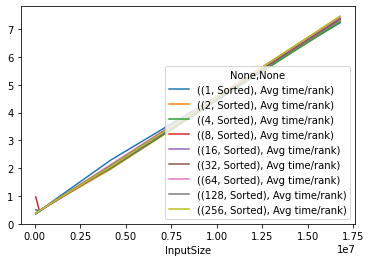

In [20]:
ctk.dataframe[[col for col in ctk.dataframe.columns if col[0][1] == "Sorted" and col[1] == "Avg time/rank"]].loc["main"].plot()

# Plotting

### Option 1
Use `pandas.DataFrame.plot` to automatically interface with matplotlib

In [21]:
def plot_pandas(df, title, xlabel, ylabel, loglog):
    plot = df.plot(kind="line", 
        marker='o', 
        title=title, 
        xlabel=xlabel,
        ylabel=ylabel, 
        grid=True,
        loglog=loglog
    )
    return plot

### Option 2
Use `matplotlib.pyplot` directly for more fine-grained control. Specifically for our case we can change the x axis scaling from base 10 to base 2.

In [22]:
def plot_mpl(df, title, xlabel, ylabel):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(
        df,
        marker='o',
    )
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend(matrix_sizes)
    plt.grid(True)
    plt.yscale("log", base=10)
    plt.xscale("log", base=2)
    plt.xticks(threads)
    plt.show()
    return fig, ax

# Examples

## time

In [23]:
ctk.dataframe.loc["main"]

(1, 1%perturbed)                     (1, Random)                    \
             Avg time/rank Avg GPU time/rank Avg time/rank Avg GPU time/rank   
InputSize                                                                      
65536             0.371744          0.024003      0.501725          0.026523   
262144            0.480645          0.099450      0.498747          0.109561   
1048576           1.106752          0.332332      0.926879          0.258224   
4194305           2.345013          1.134675      2.595581          1.224676   
16777216          8.732764          4.693408      8.331073          4.655379   

          (1, ReverseSorted)                     (1, Sorted)  \
               Avg time/rank Avg GPU time/rank Avg time/rank   
InputSize                                                      
65536               0.367648          0.021327      0.500573   
262144              0.455181          0.081391      0.460699   
1048576             1.008468          0.339485      0.832629   
4194305             2.365854          1.018305      2.294691   
16777216            7.443715          4.060278      7.235103   

                            (2, 1%perturbed)                     (2, Random)  \
          Avg GPU time/rank    Avg time/rank Avg GPU time/rank Avg time/rank   
InputSize                                                                      
65536              0.019466         0.369946          0.027167      0.392796   
262144             0.079934         0.490104          0.109636      0.482136   
1048576            0.320249         0.882578          0.309791      0.918422   
4194305            0.987639         2.502637          1.291153      2.524222   
16777216           3.897470         9.173675          5.126849      8.998872   

                            (2, ReverseSorted)                    \
          Avg GPU time/rank      Avg time/rank Avg GPU time/rank   
InputSize                                                          
65536              0.031077           0.365649          0.025320   
262144             0.100850           0.464102          0.090146   
1048576            0.396111           0.750285          0.257542   
4194305            1.367957           2.055427          1.012426   
16777216           5.323841           7.473394          4.097292   

            (2, Sorted)                   (4, 1%perturbed)                    \
          Avg time/rank Avg GPU time/rank    Avg time/rank Avg GPU time/rank   
InputSize                                                                      
65536          0.377987          0.022134         0.387817          0.027204   
262144         0.443552          0.069032         0.485410          0.107559   
1048576        0.780545          0.274081         0.867466          0.324272   
4194305        1.972881          0.947620         2.667819          1.322803   
16777216       7.313608          3.987131         9.556437          5.528027   

            (4, Random)                   (4, ReverseSorted)  \
          Avg time/rank Avg GPU time/rank      Avg time/rank   
InputSize                                                      
65536          0.380536          0.031374           0.373302   
262144         0.478930          0.111825           0.436023   
1048576        0.914983          0.392310           0.746060   
4194305        2.551207          1.390993           2.108040   
16777216       9.581530          5.870884           7.575012   

                              (4, Sorted)                   (8, 1%perturbed)  \
          Avg GPU time/rank Avg time/rank Avg GPU time/rank    Avg time/rank   
InputSize                                                                      
65536              0.020743      0.371489          0.018850         0.372297   
262144             0.074669      0.438457          0.077735         0.519704   
1048576            0.258292      0.813489          0.292490         0.899792   
4194305            1.058889      2.0

/scratch/group/csce435-f23/python-3.8.17/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:509: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


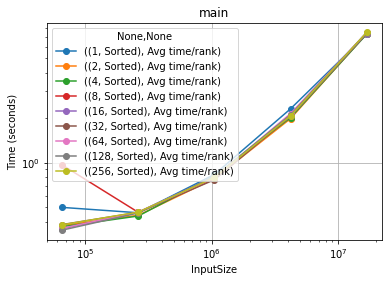

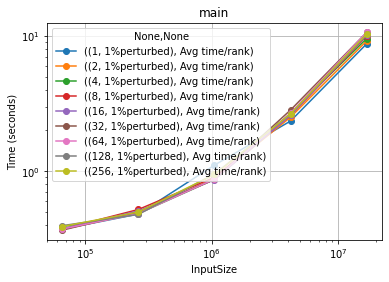

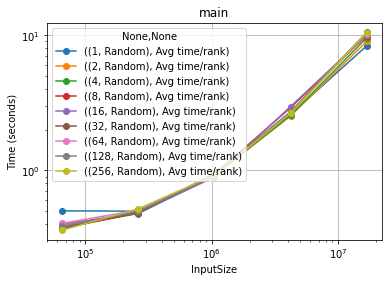

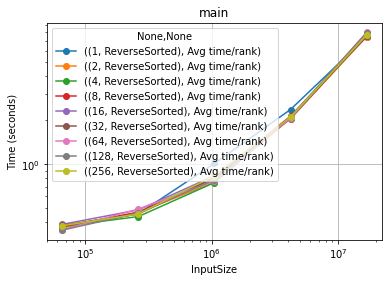

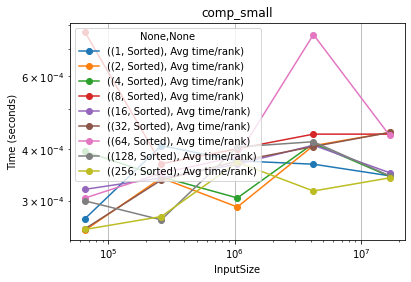

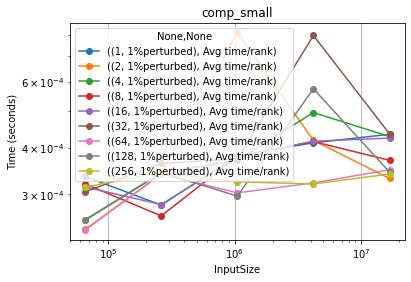

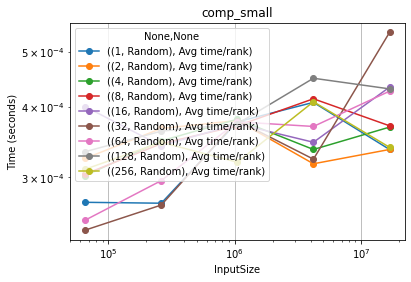

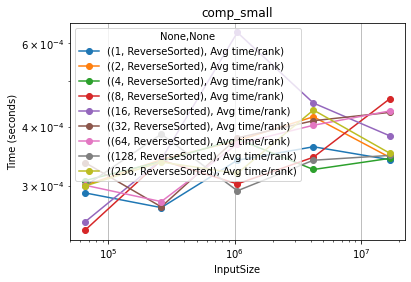

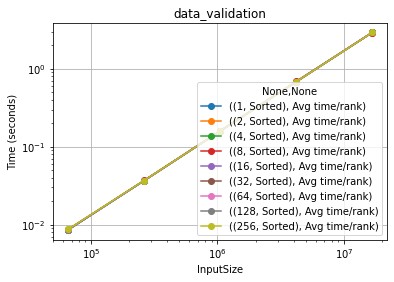

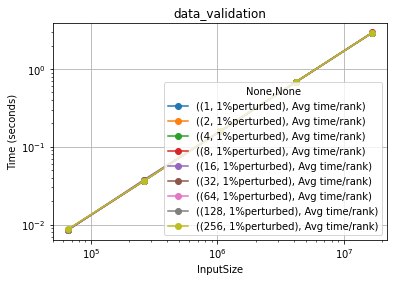

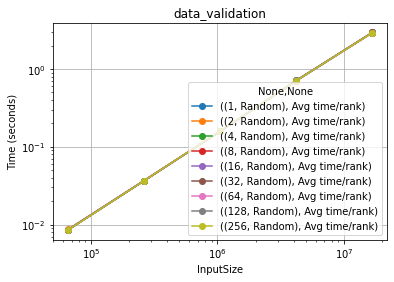

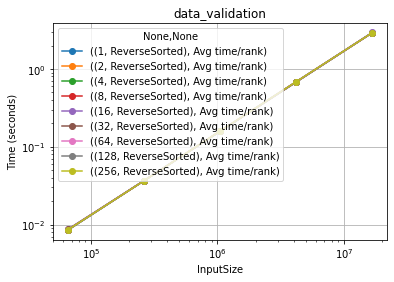

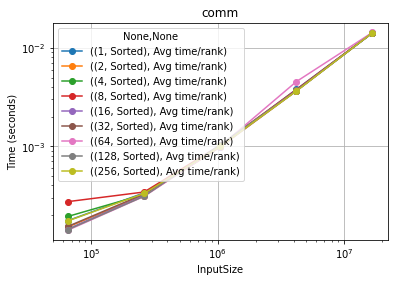

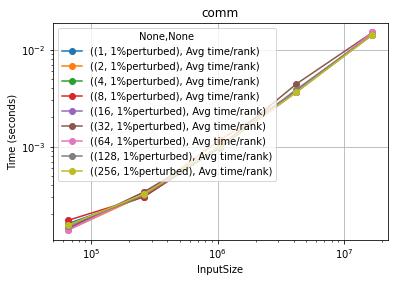

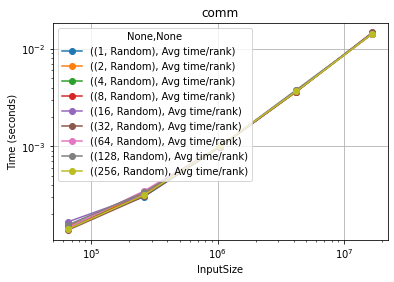

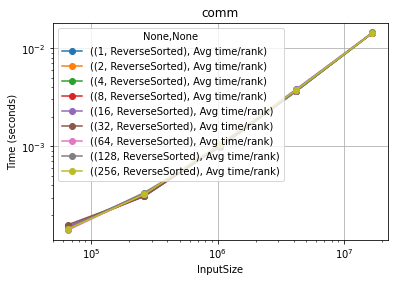

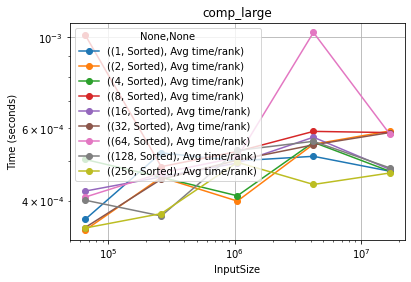

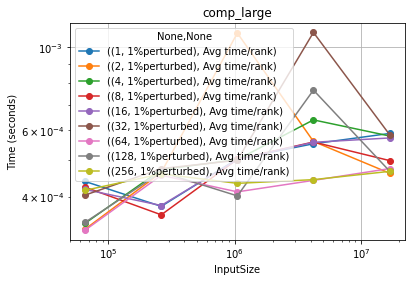

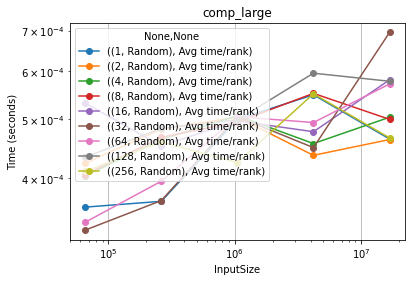

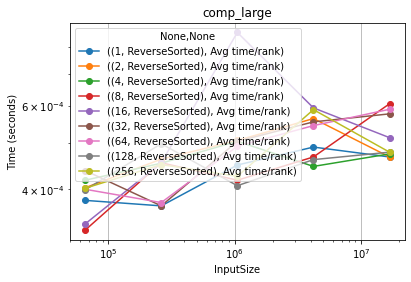

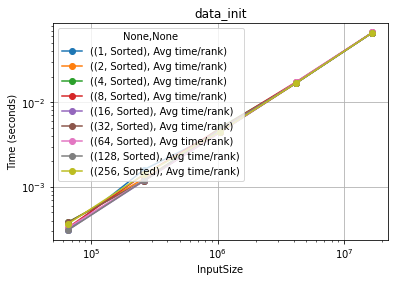

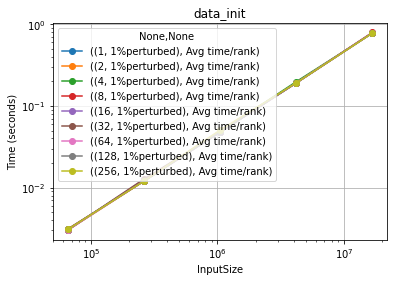

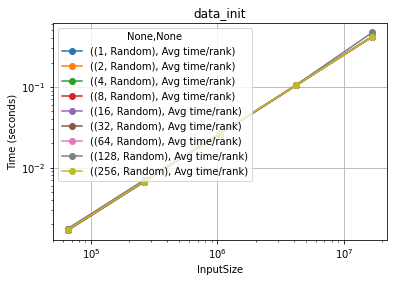

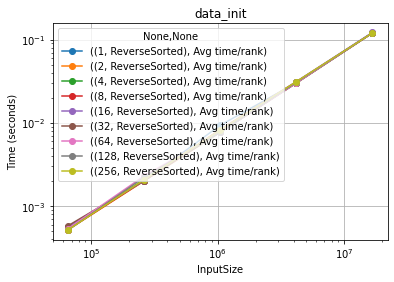

In [24]:
for name in function_names:
    for InputType in InputTypes:
        plot_pandas(
            df=ctk.dataframe[[col for col in ctk.dataframe.columns if col[0][1] == InputType and col[1] == "Avg time/rank"]].loc[name],
            title=name,
            xlabel="InputSize",
            ylabel="Time (seconds)",
            loglog=True
        )

/scratch/group/csce435-f23/python-3.8.17/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:509: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


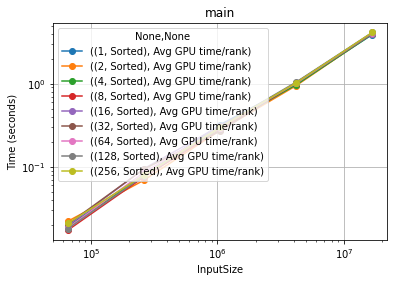

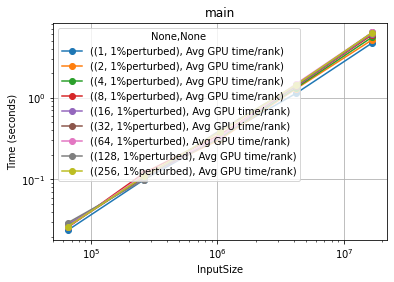

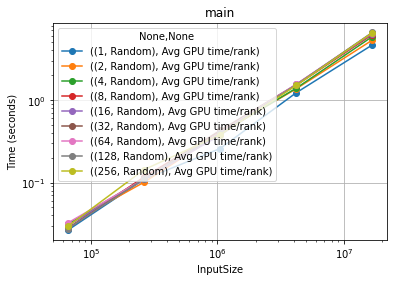

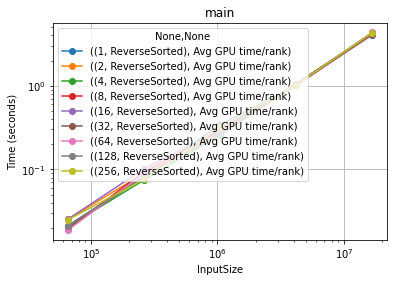

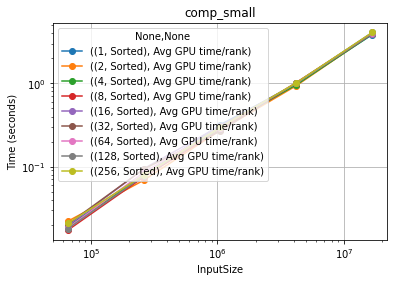

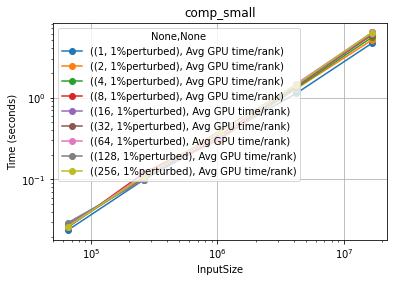

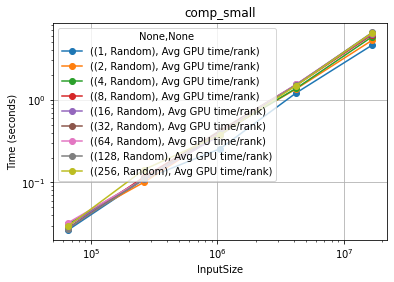

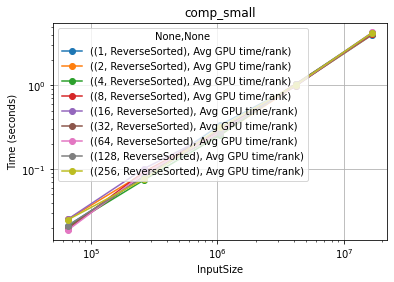

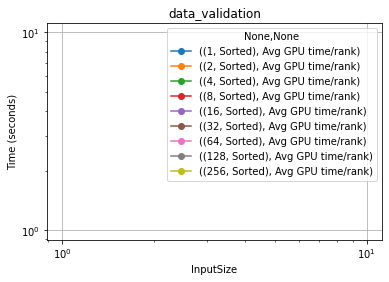

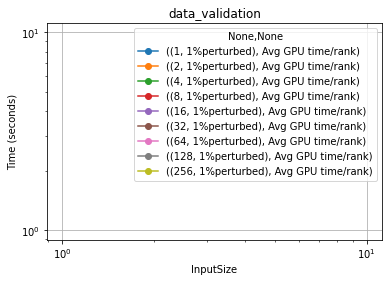

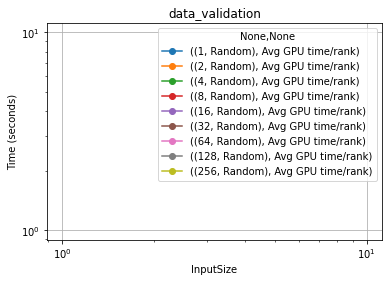

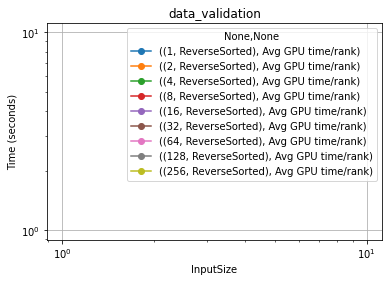

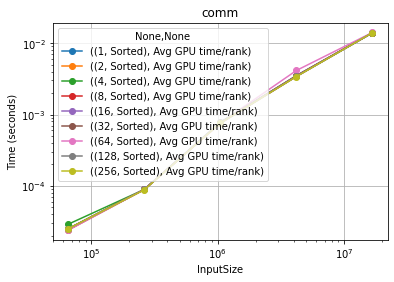

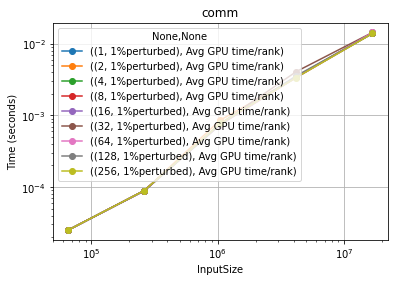

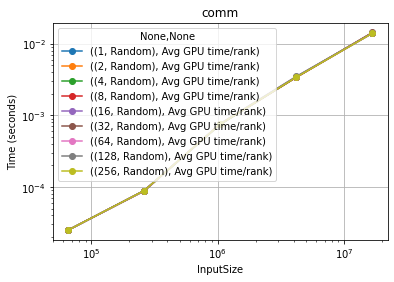

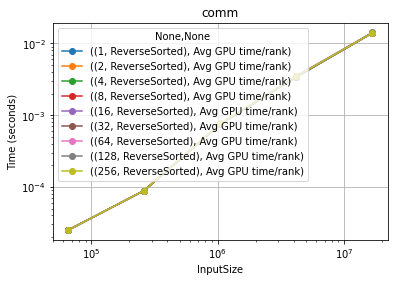

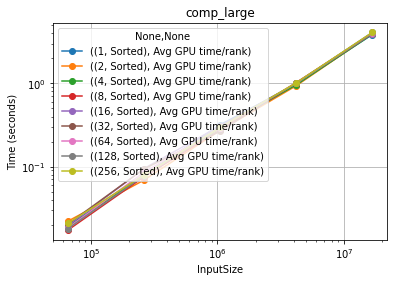

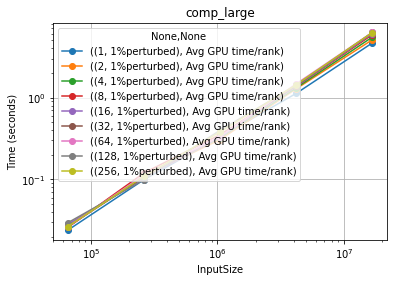

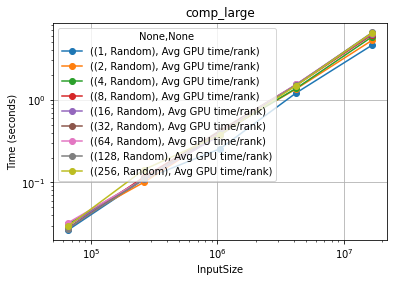

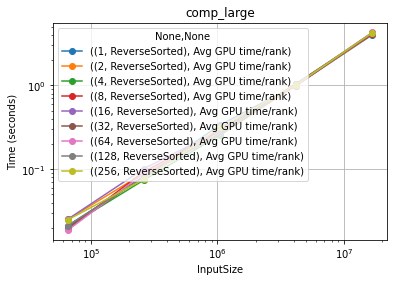

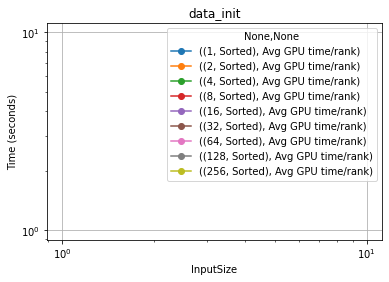

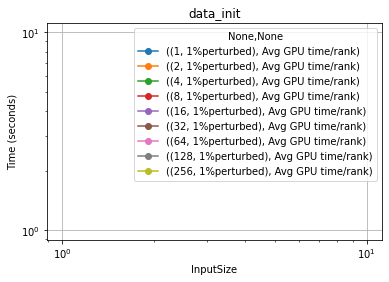

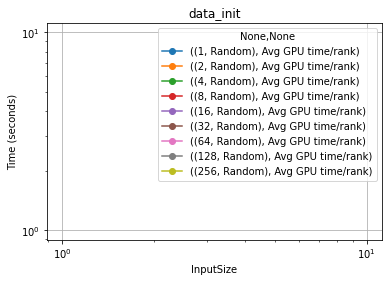

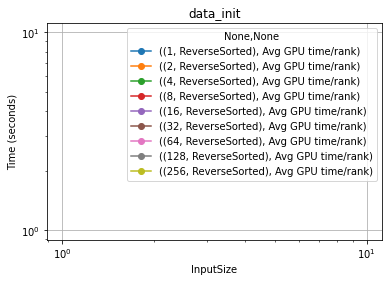

In [25]:
for name in function_names:
    for InputType in InputTypes:
        plot_pandas(
            df=ctk.dataframe[[col for col in ctk.dataframe.columns if col[0][1] == InputType and col[1] == "Avg GPU time/rank"]].loc[name],
            title=name,
            xlabel="InputSize",
            ylabel="Time (seconds)",
            loglog=True
        )